## Working with Quadkey in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/14_quadkey.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/14_quadkey.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/14_quadkey.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/14_quadkey.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2quadkey

In [2]:
from vgrid.conversion.latlon2dggs import latlon2quadkey

lat = 10.775276
lon = 106.706797
res = 14
quadkey_id = latlon2quadkey(lat, lon, res)
quadkey_id

'13223011131020'

### Quadkey to Shapely Polygon

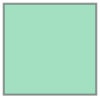

In [3]:
from vgrid.conversion.dggs2geo.quadkey2geo  import quadkey2geo

quadkey_geo = quadkey2geo(quadkey_id)
quadkey_geo

### Quadkey to GeoJSON        

In [4]:
from vgrid.conversion.dggs2geo.quadkey2geo import quadkey2geojson

quadkey_geojson = quadkey2geojson(quadkey_id)
quadkey_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.69921875, 10.768555807732435),
      (106.72119140625, 10.768555807732435),
      (106.72119140625, 10.790140750321735),
      (106.69921875, 10.790140750321735),
      (106.69921875, 10.768555807732435)),)},
   'properties': {'quadkey': '13223011131020',
    'resolution': 14,
    'center_lat': 10.7793483,
    'center_lon': 106.7102051,
    'cell_width': 2403.192,
    'cell_height': 2387.578,
    'cell_area': 5737603.485,
    'cell_perimeter': 9581.368}}]}

### Vector to Quadkey

Processing features: 100%|██████████| 4/4 [00:00<00:00, 26.18it/s]


<Axes: >

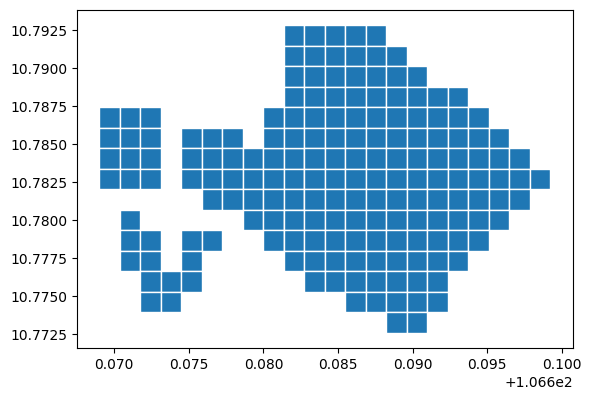

In [5]:
from vgrid.conversion.vector2dggs.vector2quadkey import vector2quadkey

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_quadkey = vector2quadkey(file_path, resolution=18, compact=False, 
                        predicate = "intersects", output_format="gpd")
# Visualize the output
vector_to_quadkey.plot(edgecolor="white")

### Quadkey Compact

<Axes: >

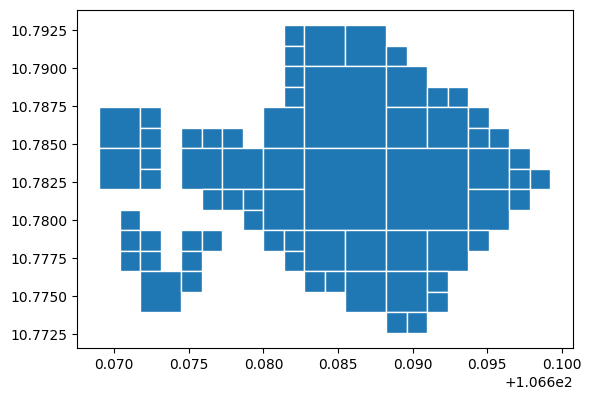

In [6]:
from vgrid.conversion.dggscompact.quadkeycompact import quadkeycompact

quadkey_compacted = quadkeycompact(
    vector_to_quadkey, quadkey_id="quadkey", output_format="gpd"
)
quadkey_compacted.plot(edgecolor="white")


### Quadkey Expand

<Axes: >

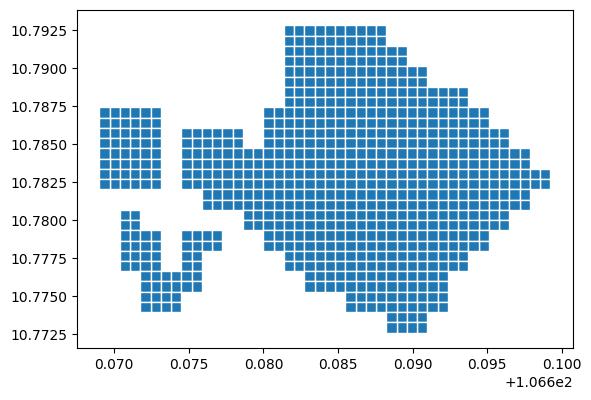

In [7]:
from vgrid.conversion.dggscompact.quadkeycompact import quadkeyexpand

quadkey_expanded = quadkeyexpand(vector_to_quadkey, resolution=19, output_format="gpd")
quadkey_expanded.plot(edgecolor="white")


### Quadkey Binning

Generating Quadkey DGGS: 768 cells [00:00, 2228.08 cells/s]


<Axes: >

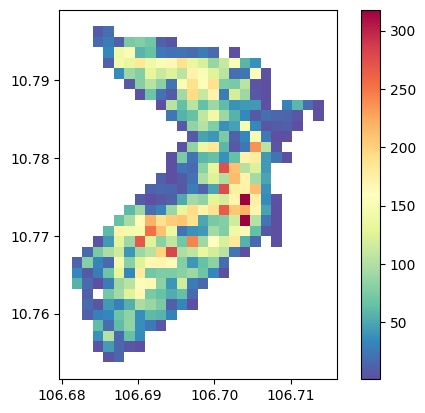

In [8]:
from vgrid.binning.quadkeybin import quadkeybin
import geopandas as gpd
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
quadkey_bin =  quadkeybin(file_path, resolution=18, stats=stats, 
                # numeric_field="confidence",
                # category="category",
                output_format="gpd")
quadkey_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)   

### Raster to Quadkey

In [9]:
# %pip install folium

In [10]:
from vgrid.conversion.raster2dggs.raster2quadkey    import raster2quadkey
from vgrid.utils.io import download_file          

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)

raster_to_quadkey =  raster2quadkey(raster_file,output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

quadkey_layer = folium.GeoJson(
    raster_to_quadkey,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["quadkey", "band_1", "band_2", "band_3"],
        aliases=["Quadkey ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(quadkey_layer.get_bounds())

# Display the map
m

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db
WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
Nearest quadkey resolution determined: 26


Converting raster to Quadkey: 100%|██████████| 8806/8806 [00:01<00:00, 7905.82 cells/s] 


### Quadkey Generator

Generating Quadkey DGGS: 195 cells [00:00, 1846.43 cells/s]


<Axes: >

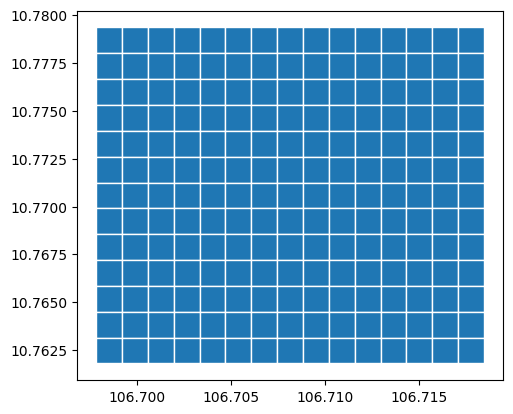

In [11]:
from vgrid.generator.quadkeygrid import quadkeygrid
# quadkey_grid = quadkeygrid(resolution=2,output_format="gpd")
quadkey_grid = quadkeygrid(resolution=18,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")
quadkey_grid.plot(edgecolor="white")

### Quadkey Inspect

In [12]:
from vgrid.stats.quadkeystats import quadkeyinspect 
resolution = 7
quadkey_inspect = quadkeyinspect(resolution)    
quadkey_inspect.head()

Generating Quadkey DGGS: 16384 cells [00:10, 1547.44 cells/s]


quadkey  resolution  center_lat  center_lon  cell_width  cell_height  \
0  0000000           7   84.926801  -178.59375   28454.129    27771.077   
1  0000002           7   84.671917  -178.59375   29879.298    29162.169   
2  0000020           7   84.404267  -178.59375   31375.156    30622.280   
3  0000022           7   84.123216  -178.59375   32945.097    32154.730   
4  0000200           7   83.828101  -178.59375   34592.666    33762.981   

      cell_area  cell_perimeter  \
0  7.711209e+08      111092.678   
1  8.503136e+08      116657.765   
2  9.375993e+08      122499.013   
3  1.033796e+09      128629.712   
4  1.139804e+09      135063.726   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-180 84.80247, -177.1875 84.80247, -...    False   0.024863   
1  POLYGON ((-180 84.54136, -177.1875 84.54136, -...    False   0.027416   
2  POLYGON ((-180 84.26717, -177.1875 84.26717, -...    False   0.030231   
3  POLYGON ((-180 83.97926, -177.1875 83.97926, -...    False   0.033332   
4  POLYGON ((-180 83.67694, -177.1875 83.67694, -...    False   0.036750   

        ipq       zsc  
0  0.785166  0.886095  
1  0.785166  0.886095  
2  0.785167  0.886096  
3  0.785167  0.886096  
4  0.785168  0.886096

### Distribution of Quadkey Area Distortions

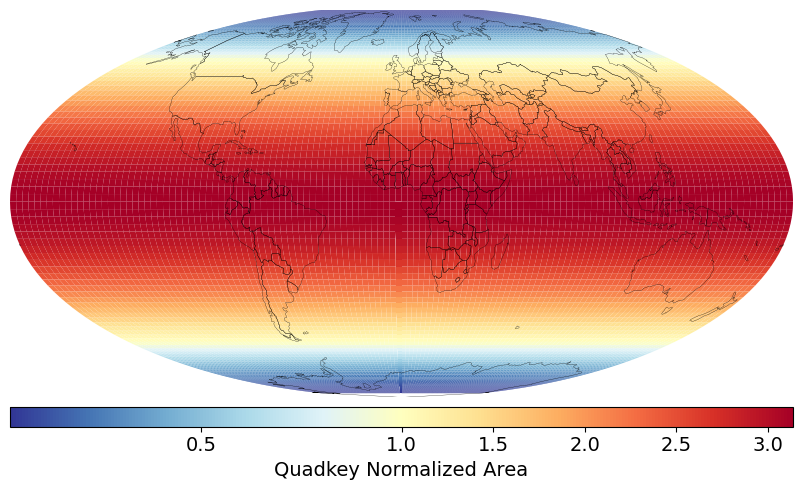

In [13]:
from vgrid.stats.quadkeystats import quadkey_norm_area
quadkey_norm_area(quadkey_inspect)

### Distribution of Quadkey IPQ Compactness

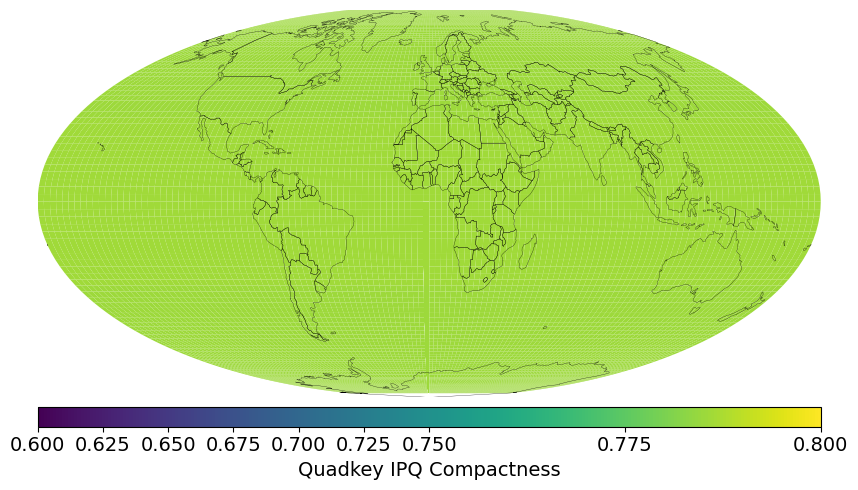

In [14]:
from vgrid.stats.quadkeystats import quadkey_compactness
quadkey_compactness(quadkey_inspect)

### Quadkey Statistics

In [15]:
from vgrid.stats import quadkeystats            
quadkeystats('km')

resolution     number_of_cells  avg_edge_len_km  avg_cell_area_km2
0            0                   1     22584.632492       5.100656e+08
1            1                   4     11292.316246       1.275164e+08
2            2                  16      5646.158123       3.187910e+07
3            3                  64      2823.079061       7.969775e+06
4            4                 256      1411.539531       1.992444e+06
5            5                1024       705.769765       4.981110e+05
6            6                4096       352.884883       1.245277e+05
7            7               16384       176.442441       3.113194e+04
8            8               65536        88.221221       7.782984e+03
9            9              262144        44.110610       1.945746e+03
10          10             1048576        22.055305       4.864365e+02
11          11             4194304        11.027653       1.216091e+02
12          12            16777216         5.513826       3.040228e+01
13          13            67108864         2.756913       7.600570e+00
14          14           268435456         1.378457       1.900143e+00
15          15          1073741824         0.689228       4.750356e-01
16          16          4294967296         0.344614       1.187589e-01
17          17         17179869184         0.172307       2.968973e-02
18          18         68719476736         0.086154       7.422432e-03
19          19        274877906944         0.043077       1.855608e-03
20          20       1099511627776         0.021538       4.639020e-04
21          21       4398046511104         0.010769       1.159755e-04
22          22      17592186044416         0.005385       2.899387e-05
23          23      70368744177664         0.002692       7.248468e-06
24          24     281474976710656         0.001346       1.812117e-06
25          25    1125899906842624         0.000673       4.530293e-07
26          26    4503599627370496         0.000337       1.132573e-07
27          27   18014398509481984         0.000168       2.831433e-08
28          28   72057594037927936         0.000084       7.078583e-09
29          29  288230376151711744         0.000042       1.769646e-09